In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt

pd.set_option('max.columns', None)

# Import Data

## Import results file

In [2]:
results = pd.read_csv('results.csv', index_col = 0)

results = results[['row', 'plc', 'horseno', 'horse', 'jockey', 'trainer', 'actualwt',
       'declarwt', 'draw', 'lbw', 'runningpos', 'finishtime', 'winodds',
       'date', 'raceno', 'class', 'distance', 'going', 'handicap', 'course',
       'stake', 'venue']]

results.head()

,row,plc,horseno,horse,jockey,trainer,actualwt,declarwt,draw,lbw,runningpos,finishtime,winodds,date,raceno,class,distance,going,handicap,course,stake,venue
0,0,1,10.0,NATURAL EIGHT(S243),C Y Ho,C Fownes,119.0,1037.0,1.0,-,4 3 1,1.10.19,3.5,2015-06-03,1,5,1200,GOOD TO FIRM,MOUNT BUTLER HANDICAP,TURF - A COURSE,575000,Happy Valley
1,0,1,7.0,SOLAR HEI HEI(T242),B Prebble,D J Hall,125.0,1077.0,11.0,-,9 8 1,1.09.06,2.3,2015-06-07,1,4,1200,GOOD TO FIRM,HKU FOUNDATION HANDICAP,TURF - A+3 COURSE,760000,Sha Tin
2,0,1,3.0,GRAN BOLIVAR(S165),H N Wong,Y S Tsui,121.0,950.0,9.0,-,1 1 1,1.09.64,32.0,2015-06-10,1,4,1200,GOOD TO FIRM,LAI ON HANDICAP,TURF - B COURSE,760000,Happy Valley
3,0,1,11.0,PEOPLE'S KNIGHT(T305),G Mosse,J Moore,120.0,1149.0,4.0,-,4 4 1,1.09.70,6.6,2015-06-14,1,1,1200,GOOD TO FIRM,BREGUET PLATE,TURF - B+2 COURSE,800000,Sha Tin
4,0,1,2.0,SIR JOHN(P344),B Prebble,W Y So,131.0,1158.0,10.0,-,1 1 1,0.56.90,6.8,2015-06-17,1,5,1000,GOOD TO FIRM,WANG TAK HANDICAP,TURF - C COURSE,575000,Happy Valley


# Convert data into Date, Venue, Course, and Race No. level

In [3]:
text = 'NATURAL EIGHT(S243)'

pattern = re.compile(r'([\w\W]+)?([\(])([A-Z0-9]+)([\)])')

def extract_horse_code(pattern, text):
#     print(text)
    match = re.match(pattern, text)
    return match.group(3)

In [4]:
results['horse_code'] = results['horse'].apply(lambda x: extract_horse_code(pattern, x))
results.head()

,row,plc,horseno,horse,jockey,trainer,actualwt,declarwt,draw,lbw,runningpos,finishtime,winodds,date,raceno,class,distance,going,handicap,course,stake,venue,horse_code
0,0,1,10.0,NATURAL EIGHT(S243),C Y Ho,C Fownes,119.0,1037.0,1.0,-,4 3 1,1.10.19,3.5,2015-06-03,1,5,1200,GOOD TO FIRM,MOUNT BUTLER HANDICAP,TURF - A COURSE,575000,Happy Valley,S243
1,0,1,7.0,SOLAR HEI HEI(T242),B Prebble,D J Hall,125.0,1077.0,11.0,-,9 8 1,1.09.06,2.3,2015-06-07,1,4,1200,GOOD TO FIRM,HKU FOUNDATION HANDICAP,TURF - A+3 COURSE,760000,Sha Tin,T242
2,0,1,3.0,GRAN BOLIVAR(S165),H N Wong,Y S Tsui,121.0,950.0,9.0,-,1 1 1,1.09.64,32.0,2015-06-10,1,4,1200,GOOD TO FIRM,LAI ON HANDICAP,TURF - B COURSE,760000,Happy Valley,S165
3,0,1,11.0,PEOPLE'S KNIGHT(T305),G Mosse,J Moore,120.0,1149.0,4.0,-,4 4 1,1.09.70,6.6,2015-06-14,1,1,1200,GOOD TO FIRM,BREGUET PLATE,TURF - B+2 COURSE,800000,Sha Tin,T305
4,0,1,2.0,SIR JOHN(P344),B Prebble,W Y So,131.0,1158.0,10.0,-,1 1 1,0.56.90,6.8,2015-06-17,1,5,1000,GOOD TO FIRM,WANG TAK HANDICAP,TURF - C COURSE,575000,Happy Valley,P344


In [5]:
#results[results['raceno'] == 1].groupby(['course','raceno']).size()

# results[(results['raceno'] == 1) & (results['date'] == '2015-06-03')].groupby(['venue','course']).size()

results.groupby(['date','venue','course','raceno']).size()


results[(results['course'] == 'TURF - A COURSE') & (results['date'] == '2015-06-03') & (results['raceno'] == 2)]

,row,plc,horseno,horse,jockey,trainer,actualwt,declarwt,draw,lbw,runningpos,finishtime,winodds,date,raceno,class,distance,going,handicap,course,stake,venue,horse_code
118,0,1,5.0,ROBUST MOMENTUM(P422),C Y Ho,C Fownes,122.0,1209.0,1.0,-,2 3 2 1,1.40.18,2.5,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,P422
1232,1,2,1.0,AXIOM(P095),A Suborics,A Schutz,129.0,1088.0,12.0,1,10 10 9 2,1.40.34,82.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,P095
2346,2,3,11.0,LIGHTNING AND GOLD(P354),W M Lai,C H Yip,114.0,1034.0,11.0,1-1/4,11 11 10 3,1.40.38,27.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,P354
3460,3,4,7.0,CHINA DELIGHT(N148),T H So,K W Lui,121.0,1031.0,2.0,1-1/4,12 12 12 4,1.40.38,13.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,N148
4574,4,5,2.0,AMAZING ALWAYS(N432),D Whyte,D E Ferraris,125.0,1133.0,7.0,1-1/4,8 7 8 5,1.40.40,6.8,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,N432
5686,5,6,10.0,RED COURAGE(N110),K Teetan,J Size,117.0,1186.0,5.0,2,3 2 3 6,1.40.50,11.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,N110
6797,6,7,12.0,DRAGON GLORY(P130),M Chadwick,C W Chang,113.0,1156.0,3.0,2,4 6 4 7,1.40.51,10.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,P130
7900,7,8,3.0,CIRCUIT STAR(N220),K C Leung,K L Man,123.0,1054.0,9.0,2,7 8 7 8,1.40.52,30.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,N220
9001,8,9,4.0,MAC ROW(N252),M L Yeung,A Lee,122.0,1001.0,8.0,3-3/4,9 9 11 9,1.40.78,9.9,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,N252
10092,9,10,8.0,CONFUCIUS SPIRIT(S329),N Callan,S Woods,120.0,1088.0,4.0,5,6 5 6 10,1.40.98,10.0,2015-06-03,2,4,1650,GOOD TO FIRM,MOUNT CAMERON HANDICAP,TURF - A COURSE,760000,Happy Valley,S329


In [6]:
results = results[results['draw'].notnull()]
results['draw'] = results['draw'].apply(int)

In [7]:
results.groupby(['date','venue','course','raceno']).size().to_frame('count_horse').reset_index()

,date,venue,course,raceno,count_horse
0,2015-06-03,Happy Valley,TURF - A COURSE,1,11
1,2015-06-03,Happy Valley,TURF - A COURSE,2,12
2,2015-06-03,Happy Valley,TURF - A COURSE,3,12
3,2015-06-03,Happy Valley,TURF - A COURSE,4,12
4,2015-06-03,Happy Valley,TURF - A COURSE,5,12
...,...,...,...,...,...
1109,2017-07-16,Sha Tin,TURF - C COURSE,7,14
1110,2017-07-16,Sha Tin,TURF - C COURSE,8,8
1111,2017-07-16,Sha Tin,TURF - C COURSE,9,14
1112,2017-07-16,Sha Tin,TURF - C COURSE,10,12


In [8]:
df = pd.pivot_table(results,
               index = ['date','venue','course','raceno'],
               columns = ['draw'],
               values = ['horse_code','declarwt','winodds','trainer','jockey'],
               aggfunc = max)

In [9]:
df.reset_index(inplace = True)
df.head()

date         venue           course raceno declarwt          \
draw                                                          1       2   
0     2015-06-03  Happy Valley  TURF - A COURSE      1   1037.0  1068.0   
1     2015-06-03  Happy Valley  TURF - A COURSE      2   1209.0  1031.0   
2     2015-06-03  Happy Valley  TURF - A COURSE      3   1052.0  1104.0   
3     2015-06-03  Happy Valley  TURF - A COURSE      4   1073.0  1076.0   
4     2015-06-03  Happy Valley  TURF - A COURSE      5   1058.0  1133.0   

                                                                              \
draw       3       4       5       6       7       8       9      10      11   
0      977.0  1053.0  1075.0  1056.0  1172.0  1154.0  1096.0  1113.0  1025.0   
1     1156.0  1088.0  1186.0  1098.0  1133.0  1001.0  1054.0  1112.0  1034.0   
2     1260.0  1203.0  1130.0  1166.0   996.0  1148.0  1214.0  1177.0  1062.0   
3     1143.0  1135.0  1166.0  1093.0  1157.0  1095.0  1081.0  1007.0  1068.0   
4     1162.0  1052.0  1095.0  1074.0  1081.0  1135.0  1039.0  1065.0  1099.0   

                     horse_code                                            \
draw      12  13  14          1     2     3     4     5     6     7     8   
0        NaN NaN NaN       S243  L251  N186  P331  P175  P204  S075  M406   
1     1088.0 NaN NaN       P422  N148  P130  S329  N110  N099  N432  N252   
2     1095.0 NaN NaN       S445  N265  M273  N055  S086  P308  T072  P088   
3     1189.0 NaN NaN       T163  S224  P213  S104  S349  N193  S330  S170   
4     1164.0 NaN NaN       S137  P016  P371  P418  T069  S157  S254  P444   

                                          jockey                       \
draw     9    10    11    12   13   14         1        2           3   
0     M255  N359  S150   NaN  NaN  NaN    C Y Ho  H W Lai  A Suborics   
1     N220  P139  P354  P095  NaN  NaN    C Y Ho   T H So  M Chadwick   
2     N134  N317  T133  T328  NaN  NaN  K Teetan  G Mosse   K C Leung   
3     L136  S160  S295  N233  NaN  NaN  H N Wong  W M Lai   K C Leung   
4     P064  N295  M026  S051  NaN  NaN    C Y Ho   T H So  M Chadwick   

                                                                           \
draw          4          5           6           7          8           9   
0        T H So    G Mosse    N Callan  M Chadwick  B Prebble  N Rawiller   
1      N Callan   K Teetan  N Rawiller     D Whyte  M L Yeung   K C Leung   
2     O Doleuze     D Lane   M L Yeung  N Rawiller    W M Lai   B Prebble   
3     Y T Cheng    G Mosse     D Whyte   B Prebble   K Teetan      D Lane   
4      N Callan  Y T Cheng     W M Lai     H W Lai    D Whyte  A Suborics   

                                                     trainer           \
draw          10          11          12   13   14         1        2   
0         D Lane     D Whyte         NaN  NaN  NaN  C Fownes    A Lee   
1        H W Lai     W M Lai  A Suborics  NaN  NaN  C Fownes  K W Lui   
2         T H So    N Callan  A Suborics  NaN  NaN    J Size  S Woods   
3     A Suborics  M Chadwick    N Callan  NaN  NaN  Y S Tsui   T K Ng   
4      B Prebble  N Rawiller     G Mosse  NaN  NaN  C Fownes  S Woods   

                                                                              \
draw          3         4            5             6             7         8   
0      A Schutz      L Ho      K L Man        D Cruz      A S Cruz  T P Yung   
1     C W Chang   S Woods       J Size        W Y So  D E Ferraris     A Lee   
2        D Cruz      L Ho  A T Millard  P O'Sullivan        W Y So   C H Yip   
3       J Moore    W Y So     A S Cruz        D Cruz      R Gibson    J Size   
4      C S Shum  A S Cruz      K L Man   A T Millard  D E Ferraris  D J Hall   

                                                              winodds        \
draw         9           10            11        12   13   14       1     2   
0       T K Ng  A T Millard  D E Ferraris       NaN  NaN  NaN     3.5  18.0   
1      K L Man     C S 

In [10]:
new_columns = []
for w in df.columns:
    if w[0] == 'horse_code':
        text = 'horse' + '_' + str(w[1])
    elif w[0] in ('date','venue','course','raceno'):
        text = w[0] + str(w[1])
    else:    
        text = w[0] + '_' + str(w[1])    
    new_columns.append(text)

# new_columns

In [11]:
df.columns = new_columns

df.head()

,date,venue,course,raceno,declarwt_1,declarwt_2,declarwt_3,declarwt_4,declarwt_5,declarwt_6,declarwt_7,declarwt_8,declarwt_9,declarwt_10,declarwt_11,declarwt_12,declarwt_13,declarwt_14,horse_1,horse_2,horse_3,horse_4,horse_5,horse_6,horse_7,horse_8,horse_9,horse_10,horse_11,horse_12,horse_13,horse_14,jockey_1,jockey_2,jockey_3,jockey_4,jockey_5,jockey_6,jockey_7,jockey_8,jockey_9,jockey_10,jockey_11,jockey_12,jockey_13,jockey_14,trainer_1,trainer_2,trainer_3,trainer_4,trainer_5,trainer_6,trainer_7,trainer_8,trainer_9,trainer_10,trainer_11,trainer_12,trainer_13,trainer_14,winodds_1,winodds_2,winodds_3,winodds_4,winodds_5,winodds_6,winodds_7,winodds_8,winodds_9,winodds_10,winodds_11,winodds_12,winodds_13,winodds_14
0,2015-06-03,Happy Valley,TURF - A COURSE,1,1037.0,1068.0,977.0,1053.0,1075.0,1056.0,1172.0,1154.0,1096.0,1113.0,1025.0,NaN,NaN,NaN,S243,L251,N186,P331,P175,P204,S075,M406,M255,N359,S150,NaN,NaN,NaN,C Y Ho,H W Lai,A Suborics,T H So,G Mosse,N Callan,M Chadwick,B Prebble,N Rawiller,D Lane,D Whyte,NaN,NaN,NaN,C Fownes,A Lee,A Schutz,L Ho,K L Man,D Cruz,A S Cruz,T P Yung,T K Ng,A T Millard,D E Ferraris,NaN,NaN,NaN,3.5,18.0,8.6,7.2,6.6,4.5,21.0,15.0,13.0,49.0,19.0,NaN,NaN,NaN
1,2015-06-03,Happy Valley,TURF - A COURSE,2,1209.0,1031.0,1156.0,1088.0,1186.0,1098.0,1133.0,1001.0,1054.0,1112.0,1034.0,1088.0,NaN,NaN,P422,N148,P130,S329,N110,N099,N432,N252,N220,P139,P354,P095,NaN,NaN,C Y Ho,T H So,M Chadwick,N Callan,K Teetan,N Rawiller,D Whyte,M L Yeung,K C Leung,H W Lai,W M Lai,A Suborics,NaN,NaN,C Fownes,K W Lui,C W Chang,S Woods,J Size,W Y So,D E Ferraris,A Lee,K L Man,C S Shum,C H Yip,A Schutz,NaN,NaN,2.5,13.0,10.0,10.0,11.0,10.0,6.8,9.9,30.0,38.0,27.0,82.0,NaN,NaN
2,2015-06-03,Happy Valley,TURF - A COURSE,3,1052.0,1104.0,1260.0,1203.0,1130.0,1166.0,996.0,1148.0,1214.0,1177.0,1062.0,1095.0,NaN,NaN,S445,N265,M273,N055,S086,P308,T072,P088,N134,N317,T133,T328,NaN,NaN,K Teetan,G Mosse,K C Leung,O Doleuze,D Lane,M L Yeung,N Rawiller,W M Lai,B Prebble,T H So,N Callan,A Suborics,NaN,NaN,J Size,S Woods,D Cruz,L Ho,A T Millard,P O'Sullivan,W Y So,C H Yip,Y S Tsui,A Lee,P F Yiu,C Fownes,NaN,NaN,3.9,15.0,6.0,10.0,99.0,5.6,22.0,99.0,4.6,11.0,14.0,51.0,NaN,NaN
3,2015-06-03,Happy Valley,TURF - A COURSE,4,1073.0,1076.0,1143.0,1135.0,1166.0,1093.0,1157.0,1095.0,1081.0,1007.0,1068.0,1189.0,NaN,NaN,T163,S224,P213,S104,S349,N193,S330,S170,L136,S160,S295,N233,NaN,NaN,H N Wong,W M Lai,K C Leung,Y T Cheng,G Mosse,D Whyte,B Prebble,K Teetan,D Lane,A Suborics,M Chadwick,N Callan,NaN,NaN,Y S Tsui,T K Ng,J Moore,W Y So,A S Cruz,D Cruz,R Gibson,J Size,T P Yung,C S Shum,P F Yiu,C Fownes,NaN,NaN,8.5,12.0,4.0,12.0,16.0,3.4,23.0,15.0,56.0,11.0,43.0,10.0,NaN,NaN
4,2015-06-03,Happy Valley,TURF - A COURSE,5,1058.0,1133.0,1162.0,1052.0,1095.0,1074.0,1081.0,1135.0,1039.0,1065.0,1099.0,1164.0,NaN,NaN,S137,P016,P371,P418,T069,S157,S254,P444,P064,N295,M026,S051,NaN,NaN,C Y Ho,T H So,M Chadwick,N Callan,Y T Cheng,W M Lai,H W Lai,D Whyte,A Suborics,B Prebble,N Rawiller,G Mosse,NaN,NaN,C Fownes,S Woods,C S Shum,A S Cruz,K L Man,A T Millard,D E Ferraris,D J Hall,C H Yip,W Y So,D Cruz,T K Ng,NaN,NaN,5.3,15.0,9.0,10.0,4.4,99.0,14.0,3.0,37.0,38.0,32.0,28.0,NaN,NaN


In [12]:
df.fillna('N/A', inplace = True)

df

,date,venue,course,raceno,declarwt_1,declarwt_2,declarwt_3,declarwt_4,declarwt_5,declarwt_6,declarwt_7,declarwt_8,declarwt_9,declarwt_10,declarwt_11,declarwt_12,declarwt_13,declarwt_14,horse_1,horse_2,horse_3,horse_4,horse_5,horse_6,horse_7,horse_8,horse_9,horse_10,horse_11,horse_12,horse_13,horse_14,jockey_1,jockey_2,jockey_3,jockey_4,jockey_5,jockey_6,jockey_7,jockey_8,jockey_9,jockey_10,jockey_11,jockey_12,jockey_13,jockey_14,trainer_1,trainer_2,trainer_3,trainer_4,trainer_5,trainer_6,trainer_7,trainer_8,trainer_9,trainer_10,trainer_11,trainer_12,trainer_13,trainer_14,winodds_1,winodds_2,winodds_3,winodds_4,winodds_5,winodds_6,winodds_7,winodds_8,winodds_9,winodds_10,winodds_11,winodds_12,winodds_13,winodds_14
0,2015-06-03,Happy Valley,TURF - A COURSE,1,1037,1068,977,1053,1075,1056,1172,1154,1096,1113,1025,N/A,N/A,N/A,S243,L251,N186,P331,P175,P204,S075,M406,M255,N359,S150,N/A,N/A,N/A,C Y Ho,H W Lai,A Suborics,T H So,G Mosse,N Callan,M Chadwick,B Prebble,N Rawiller,D Lane,D Whyte,N/A,N/A,N/A,C Fownes,A Lee,A Schutz,L Ho,K L Man,D Cruz,A S Cruz,T P Yung,T K Ng,A T Millard,D E Ferraris,N/A,N/A,N/A,3.5,18,8.6,7.2,6.6,4.5,21,15,13,49,19,N/A,N/A,N/A
1,2015-06-03,Happy Valley,TURF - A COURSE,2,1209,1031,1156,1088,1186,1098,1133,1001,1054,1112,1034,1088,N/A,N/A,P422,N148,P130,S329,N110,N099,N432,N252,N220,P139,P354,P095,N/A,N/A,C Y Ho,T H So,M Chadwick,N Callan,K Teetan,N Rawiller,D Whyte,M L Yeung,K C Leung,H W Lai,W M Lai,A Suborics,N/A,N/A,C Fownes,K W Lui,C W Chang,S Woods,J Size,W Y So,D E Ferraris,A Lee,K L Man,C S Shum,C H Yip,A Schutz,N/A,N/A,2.5,13,10,10,11,10,6.8,9.9,30,38,27,82,N/A,N/A
2,2015-06-03,Happy Valley,TURF - A COURSE,3,1052,1104,1260,1203,1130,1166,996,1148,1214,1177,1062,1095,N/A,N/A,S445,N265,M273,N055,S086,P308,T072,P088,N134,N317,T133,T328,N/A,N/A,K Teetan,G Mosse,K C Leung,O Doleuze,D Lane,M L Yeung,N Rawiller,W M Lai,B Prebble,T H So,N Callan,A Suborics,N/A,N/A,J Size,S Woods,D Cruz,L Ho,A T Millard,P O'Sullivan,W Y So,C H Yip,Y S Tsui,A Lee,P F Yiu,C Fownes,N/A,N/A,3.9,15,6,10,99,5.6,22,99,4.6,11,14,51,N/A,N/A
3,2015-06-03,Happy Valley,TURF - A COURSE,4,1073,1076,1143,1135,1166,1093,1157,1095,1081,1007,1068,1189,N/A,N/A,T163,S224,P213,S104,S349,N193,S330,S170,L136,S160,S295,N233,N/A,N/A,H N Wong,W M Lai,K C Leung,Y T Cheng,G Mosse,D Whyte,B Prebble,K Teetan,D Lane,A Suborics,M Chadwick,N Callan,N/A,N/A,Y S Tsui,T K Ng,J Moore,W Y So,A S Cruz,D Cruz,R Gibson,J Size,T P Yung,C S Shum,P F Yiu,C Fownes,N/A,N/A,8.5,12,4,12,16,3.4,23,15,56,11,43,10,N/A,N/A
4,2015-06-03,Happy Valley,TURF - A COURSE,5,1058,1133,1162,1052,1095,1074,1081,1135,1039,1065,1099,1164,N/A,N/A,S137,P016,P371,P418,T069,S157,S254,P444,P064,N295,M026,S051,N/A,N/A,C Y Ho,T H So,M Chadwick,N Callan,Y T Cheng,W M Lai,H W Lai,D Whyte,A Suborics,B Prebble,N Rawiller,G Mosse,N/A,N/A,C Fownes,S Woods,C S Shum,A S Cruz,K L Man,A T Millard,D E Ferraris,D J Hall,C H Yip,W Y So,D Cruz,T K Ng,N/A,N/A,5.3,15,9,10,4.4,99,14,3,37,38,32,28,N/A,N/A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1109,2017-07-16,Sha Tin,TURF - C COURSE,7,1134,1203,1036,1033,1100,1233,1078,1141,1057,1120,1118,1017,1146,985,S332,A096,A120,S312,V361,T376,T046,V321,T094,V381,A095,A135,A109,V192,J Moreira,A Sanna,N Callan,M F Poon,M L Yeung,H N Wong,K K Chiong,D Whyte,B Prebble,S Clipperton,Z Purton,U Rispoli,C Y Ho,K Teetan,J Size,C H Yip,K L Man,D J Hall,W Y So,A Lee,C S Shum,C W Chang,C Fownes,J Moore,L Ho,Y S Tsui,A S Cruz,D E Ferraris,11,38,4.7,4.3,30,19,23,8.4,16,14,7.2,12,30,30
1110,2017-07-16,Sha Tin,TURF - C COURSE,8,1198,1129,1092,1279,1171,1259,1094,1183,N/A,N/A,N/A,N/A,N/A,N/A,A066,T198,V397,P230,S393,V181,T118,A113,N/A,N/A,N/A,N/A,N/A,N/A,K C Ng,M L Yeung,J Moreira,M F Poon,D Whyte,K Teetan,C Murray,S Clipperton,N/A,N/A

In [13]:
win = pd.pivot_table(results[(results['plc'] == '1') | (results['plc'] == '1 DH')],
               index = ['date','venue','course','raceno'],
               values = ['draw'])

win = win.reset_index().rename(columns = {'draw':'draw_winner'})

In [14]:
win

,date,venue,course,raceno,draw_winner
0,2015-06-03,Happy Valley,TURF - A COURSE,1,1.0
1,2015-06-03,Happy Valley,TURF - A COURSE,2,1.0
2,2015-06-03,Happy Valley,TURF - A COURSE,3,1.0
3,2015-06-03,Happy Valley,TURF - A COURSE,4,6.0
4,2015-06-03,Happy Valley,TURF - A COURSE,5,7.0
...,...,...,...,...,...
1109,2017-07-16,Sha Tin,TURF - C COURSE,7,11.0
1110,2017-07-16,Sha Tin,TURF - C COURSE,8,1.0
1111,2017-07-16,Sha Tin,TURF - C COURSE,9,7.0
1112,2017-07-16,Sha Tin,TURF - C COURSE,10,8.0


## Extracting horse code from the horse name

## Import horse info file

In [15]:
horse_info = pd.read_csv('horse_info.csv', index_col = 0)

horse_info.head()

,horse,country,trainer,colour,sex,owner,import_type,current_rating,start_rating,sire,dam,age
0,()(S259),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(C368),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A BEAUTIFUL(T421),AUS,W Y So,Bay,Gelding,Sandia Yit Lau Ying Lam & Yit Kwok Leung,PP,64.0,58.0,Bushranger,Anfield,6.0
3,A FAST ONE(S424),AUS,D E Ferraris,Bay,Gelding,Samson Yip Yan Tion & David Vrijmoed,PPG,37.0,40.0,Holy Roman Emperor,Detail,6.0
4,A SHIN HIKARI(V614),JPN,NaN,Grey,Horse,Eishindo Co Ltd,VIS,NaN,NaN,Deep Impact,Catalina,NaN


## Extracting horse code from the horse name

In [16]:
horse_info['horse_code'] = horse_info['horse'].apply(lambda x: extract_horse_code(pattern, x))
horse_info.head()

,horse,country,trainer,colour,sex,owner,import_type,current_rating,start_rating,sire,dam,age,horse_code
0,()(S259),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S259
1,(C368),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C368
2,A BEAUTIFUL(T421),AUS,W Y So,Bay,Gelding,Sandia Yit Lau Ying Lam & Yit Kwok Leung,PP,64.0,58.0,Bushranger,Anfield,6.0,T421
3,A FAST ONE(S424),AUS,D E Ferraris,Bay,Gelding,Samson Yip Yan Tion & David Vrijmoed,PPG,37.0,40.0,Holy Roman Emperor,Detail,6.0,S424
4,A SHIN HIKARI(V614),JPN,NaN,Grey,Horse,Eishindo Co Ltd,VIS,NaN,NaN,Deep Impact,Catalina,NaN,V614


In [17]:
horse_dim = horse_info[['horse_code','sex','country','age']]

horse_dim.loc[horse_dim['sex'].isnull(), 'sex'] = 'Others'
horse_dim.loc[horse_dim['sex'].isin(["Colt", "Rig", "Horse", "Gelding"]), 'sex'] = 'Male'
horse_dim.loc[horse_dim['sex'].isin(["Mare", "Filly"]), 'sex'] = 'Female'
horse_dim.loc[horse_dim['sex'].isin(["Brown", "Roan", "Grey"]), 'sex'] = 'Others'

horse_dim.loc[~horse_dim['country'].isin(["AUS", "NZ"]), 'country'] = 'Others'

# horse_dim.loc[horse_dim['age'].isnull(), 'age'] = np.mean(horse_dim['age'])
horse_dim['age'] = horse_dim.groupby(['country']).transform(lambda x: x.fillna(x.mean(skipna = True)))

no_horse = pd.DataFrame([['N/A','N/A','N/A',0]],columns = ['horse_code','sex','country','age'])

horse_dim = pd.concat([horse_dim,no_horse]).reset_index(drop = True)

horse_dim

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,horse_code,sex,country,age
0,S259,Others,Others,5.401361
1,C368,Others,Others,5.401361
2,T421,Male,AUS,6.000000
3,S424,Male,AUS,6.000000
4,V614,Male,Others,5.401361
...,...,...,...,...
3936,A221,Male,AUS,4.000000
3937,K180,Male,Others,5.401361
3938,B113,Male,NZ,4.000000
3939,V335,Male,Others,5.401361


In [18]:
dummy = pd.get_dummies(horse_dim[['sex','country']])

horse_dim = pd.merge(horse_dim, dummy, left_index = True, right_index = True)
horse_dim.drop(columns = ['sex','country'], inplace = True)

In [19]:
horse_dim

,horse_code,age,sex_Female,sex_Male,sex_N/A,sex_Others,country_AUS,country_N/A,country_NZ,country_Others
0,S259,5.401361,0,0,0,1,0,0,0,1
1,C368,5.401361,0,0,0,1,0,0,0,1
2,T421,6.000000,0,1,0,0,1,0,0,0
3,S424,6.000000,0,1,0,0,1,0,0,0
4,V614,5.401361,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
3936,A221,4.000000,0,1,0,0,1,0,0,0
3937,K180,5.401361,0,1,0,0,0,0,0,1
3938,B113,4.000000,0,1,0,0,0,0,1,0
3939,V335,5.401361,0,1,0,0,0,0,0,1


In [20]:
horse_dynamic_dim = pd.read_csv('horse_dynamic_dim.csv', index_col = 0)
jockey_dim = pd.read_csv('jockey_dim.csv', index_col = 0) 
trainer_dim = pd.read_csv('trainer_dim.csv', index_col = 0)

In [21]:
horse_dynamic_dim.fillna('N/A', inplace = True)
horse_dynamic_dim.replace([np.inf,-np.inf], 0 , inplace = True)
horse_dynamic_dim.replace(-1, 0 , inplace = True)
horse_dynamic_dim.describe()

,appear_cum,win_cum,top3_cum,class,class_change,win_rate,top3_rate,win_rate_pct_change,top3_pct_change
count,13947.000000,13947.000000,13947.000000,13947.000000,13947.000000,13947.000000,13947.000000,13947.000000,13947.000000
mean,5.235176,0.360077,1.688392,3.415430,0.109271,0.007986,0.299492,-0.111619,-0.100752
std,4.535617,0.727041,1.964655,1.078285,0.464691,0.270400,0.400862,0.144841,0.127751
min,0.000000,0.000000,0.000000,0.000000,-4.000000,-0.500000,-0.500000,-0.500000,-0.500000
25%,2.000000,0.000000,0.000000,3.000000,0.000000,-0.111111,0.000000,-0.166667,-0.142857
50%,4.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.200000,-0.066667,-0.071429
75%,8.000000,0.000000,3.000000,4.000000,0.000000,0.000000,0.545455,0.000000,0.000000
max,31.000000,6.000000,10.000000,5.000000,4.000000,1.000000,1.000000,0.000000,0.000000


In [22]:
jockey_dim.fillna('N/A', inplace = True)
jockey_dim.replace([np.inf,-np.inf], 0 , inplace = True)
jockey_dim.describe()

,appear_cum,win_cum,top2_cum,top3_cum,win_rate,top2_rate,top3_rate
count,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000,2740.000000
mean,249.345255,21.568978,42.563139,63.350730,0.074620,0.152003,0.230933
std,209.973782,31.405659,52.797622,73.723198,0.072678,0.119786,0.158931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,62.750000,3.000000,6.000000,11.000000,0.033057,0.084686,0.148372
50%,208.000000,12.000000,27.000000,41.000000,0.055556,0.128642,0.216216
75%,398.500000,29.000000,60.000000,92.000000,0.094154,0.195708,0.292369
max,888.000000,226.000000,347.000000,483.000000,1.000000,1.500000,2.000000


In [23]:
trainer_dim.fillna('N/A', inplace = True)
trainer_dim.replace([np.inf,-np.inf], 0 , inplace = True)
trainer_dim.describe()

,appear_cum,win_cum,top2_cum,top3_cum,win_rate,top2_rate,top3_rate
count,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000,3315.000000
mean,286.861538,23.556561,47.026546,70.524585,0.078512,0.156590,0.234281
std,200.826693,20.193498,37.409975,55.054153,0.068080,0.091285,0.117224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,114.000000,8.000000,16.000000,24.500000,0.048820,0.115799,0.182393
50%,272.000000,19.000000,41.000000,62.000000,0.071429,0.156818,0.237383
75%,439.000000,35.000000,72.000000,106.000000,0.097517,0.187071,0.276714
max,776.000000,114.000000,204.000000,284.000000,2.000000,2.000000,2.000000


## Create dataset for prediction

In [24]:
pre_df = pd.merge(df, win
    , left_on = ['date','venue','course','raceno']
    , right_on = ['date','venue','course','raceno'])

In [25]:
# Join with Horse Dimension Static

tmp = pd.merge(pre_df, horse_dim,
        left_on = f'horse_1',
        right_on = 'horse_code',
        suffixes = ('',''))

for i in range(2,14):
    tmp = pd.merge(tmp, horse_dim,
    left_on = f'horse_{i}',
    right_on = 'horse_code',
    suffixes = ('',f'_{i}'))

tmp = pd.merge(tmp, horse_dim,
        left_on = f'horse_14',
        right_on = 'horse_code',
        suffixes = ('_1','_14'))

# Join with Horse Dimension Dynamic

tmp = pd.merge(tmp, horse_dynamic_dim,
        left_on = [f'horse_1','date'],
        right_on = ['horse_code','date'],
        suffixes = ('',''))

for i in range(2,14):
    tmp = pd.merge(tmp, horse_dynamic_dim,
    left_on = [f'horse_{i}','date'],
    right_on = ['horse_code','date'],
    suffixes = ('',f'_{i}'))

tmp = pd.merge(tmp, horse_dynamic_dim,
        left_on = [f'horse_14','date'],
        right_on = ['horse_code','date'],
        suffixes = ('_1','_14'))

# Join with Trainer Dimension Dynamic

tmp = pd.merge(tmp, trainer_dim,
        left_on = [f'trainer_1','date'],
        right_on = ['trainer','date'],
        suffixes = ('',''))

for i in range(2,14):
    tmp = pd.merge(tmp, trainer_dim,
    left_on = [f'trainer_{i}','date'],
    right_on = ['trainer','date'],
    suffixes = ('',f'_{i}'))

tmp = pd.merge(tmp, trainer_dim,
        left_on = [f'trainer_14','date'],
        right_on = ['trainer','date'],
        suffixes = ('_1','_14'))

# Join with Jockey Dimension Dynamic

tmp = pd.merge(tmp, jockey_dim,
        left_on = [f'jockey_1','date'],
        right_on = ['jockey','date'],
        suffixes = ('',''))

for i in range(2,14):
    tmp = pd.merge(tmp, jockey_dim,
    left_on = [f'jockey_{i}','date'],
    right_on = ['jockey','date'],
    suffixes = ('',f'_{i}'))

tmp = pd.merge(tmp, jockey_dim,
        left_on = [f'jockey_14','date'],
        right_on = ['jockey','date'],
        suffixes = ('_1','_14'))

dummy2 = pd.get_dummies(tmp[['venue','course']])

tmp = pd.merge(tmp, dummy2, left_index = True, right_index = True)

final = tmp.drop(columns = ['venue','course',
                'horse_1','horse_2','horse_3','horse_4','horse_5','horse_6','horse_7',
                'horse_8', 'horse_9','horse_10','horse_11','horse_12','horse_13','horse_14',
                'horse_code_1','horse_code_2','horse_code_3','horse_code_4','horse_code_5','horse_code_6','horse_code_7',
                'horse_code_8', 'horse_code_9','horse_code_10','horse_code_11','horse_code_12','horse_code_13','horse_code_14',
                'jockey_1','jockey_2','jockey_3','jockey_4','jockey_5','jockey_6','jockey_7',
                'jockey_8','jockey_9','jockey_10','jockey_11','jockey_12','jockey_13','jockey_14',
                'trainer_1','trainer_2','trainer_3','trainer_4','trainer_5','trainer_6','trainer_7',
                'trainer_8','trainer_9','trainer_10','trainer_11','trainer_12','trainer_13','trainer_14'])

final.replace('N/A', 0, inplace = True)

final

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,date,raceno,declarwt_1,declarwt_2,declarwt_3,declarwt_4,declarwt_5,declarwt_6,declarwt_7,declarwt_8,declarwt_9,declarwt_10,declarwt_11,declarwt_12,declarwt_13,declarwt_14,winodds_1,winodds_2,winodds_3,winodds_4,winodds_5,winodds_6,winodds_7,winodds_8,winodds_9,winodds_10,winodds_11,winodds_12,winodds_13,winodds_14,draw_winner,age_1,sex_Female_1,sex_Male_1,sex_N/A_1,sex_Others_1,country_AUS_1,country_N/A_1,country_NZ_1,country_Others_1,age_2,sex_Female_2,sex_Male_2,sex_N/A_2,sex_Others_2,country_AUS_2,country_N/A_2,country_NZ_2,country_Others_2,age_3,sex_Female_3,sex_Male_3,sex_N/A_3,sex_Others_3,country_AUS_3,country_N/A_3,country_NZ_3,country_Others_3,age_4,sex_Female_4,sex_Male_4,sex_N/A_4,sex_Others_4,country_AUS_4,country_N/A_4,country_NZ_4,country_Others_4,age_5,sex_Female_5,sex_Male_5,sex_N/A_5,sex_Others_5,country_AUS_5,country_N/A_5,country_NZ_5,country_Others_5,age_6,sex_Female_6,sex_Male_6,sex_N/A_6,sex_Others_6,country_AUS_6,country_N/A_6,country_NZ_6,country_Others_6,age_7,sex_Female_7,sex_Male_7,sex_N/A_7,sex_Others_7,country_AUS_7,country_N/A_7,country_NZ_7,country_Others_7,age_8,sex_Female_8,sex_Male_8,sex_N/A_8,sex_Others_8,country_AUS_8,country_N/A_8,country_NZ_8,country_Others_8,age_9,sex_Female_9,sex_Male_9,sex_N/A_9,sex_Others_9,country_AUS_9,country_N/A_9,country_NZ_9,country_Others_9,age_10,sex_Female_10,sex_Male_10,sex_N/A_10,sex_Others_10,country_AUS_10,country_N/A_10,country_NZ_10,country_Others_10,age_11,sex_Female_11,sex_Male_11,sex_N/A_11,sex_Others_11,country_AUS_11,country_N/A_11,country_NZ_11,country_Others_11,age_12,sex_Female_12,sex_Male_12,sex_N/A_12,sex_Others_12,country_AUS_12,country_N/A_12,country_NZ_12,country_Others_12,age_13,sex_Female_13,sex_Male_13,sex_N/A_13,sex_Others_13,country_AUS_13,country_N/A_13,country_NZ_13,country_Others_13,age_14,sex_Female_14,sex_Male_14,sex_N/A_14,sex_Others_14,country_AUS_14,country_N/A_14,country_NZ_14,country_Others_14,appear_cum_1,win_cum_1,top3_cum_1,class_1,class_change_1,win_rate_1,top3_rate_1,win_rate_pct_change_1,top3_pct_change_1,appear_cum_2,win_cum_2,top3_cum_2,class_2,class_change_2,win_rate_2,top3_rate_2,win_rate_pct_change_2,top3_pct_change_2,appear_cum_3,win_cum_3,top3_cum_3,class_3,class_change_3,win_rate_3,top3_rate_3,win_rate_pct_change_3,top3_pct_change_3,appear_cum_4,win_cum_4,top3_cum_4,class_4,class_change_4,win_rate_4,top3_rate_4,win_rate_pct_change_4,top3_pct_change_4,appear_cum_5,win_cum_5,top3_cum_5,class_5,class_change_5,win_rate_5,top3_rate_5,win_rate_pct_change_5,top3_pct_change_5,appear_cum_6,win_cum_6,top3_cum_6,class_6,class_change_6,win_rate_6,top3_rate_6,win_rate_pct_change_6,top3_pct_change_6,appear_cum_7,win_cum_7,top3_cum_7,class_7,class_change_7,win_rate_7,top3_rate_7,win_rate_pct_change_7,top3_pct_change_7,appear_cum_8,win_cum_8,top3_cum_8,class_8,class_change_8,win_rate_8,top3_rate_8,win_rate_pct_change_8,top3_pct_change_8,appear_cum_9,win_cum_9,top3_cum_9,class_9,class_change_9,win_rate_9,top3_rate_9,win_rate_pct_change_9,top3_pct_change_9,appear_cum_10,win_cum_10,top3_cum_10,class_10,class_change_10,win_rate_10,top3_rate_10,win_rate_pct_change_10,top3_pct_change_10,appear_cum_11,win_cum_11,top3_cum_11,class_11,class_change_11,win_rate_11,top3_rate_11,win_rate_pct_change_11,top3_pct_change_11,appear_cum_12,win_cum_12,top3_cum_12,class_12,class_change_12,win_rate_12,top3_rate_12,win_rate_pct_change_12,top3_pct_change_12,appear_cum_13,win_cum_13,top3_cum_13,class_13,class_change_13,win_rate_13,top3_rate_13,win_rate_pct_change_13,top3_pct_change_13,appear_cum_14,win_cum_14,top3_cum_14,class_14,class_change_14,win_rate_14,top3_rate_14,win_rate_pct_change_14,top3_pct_change_14,appear_cum_1,win_cum_1,top2_cum_1,top3_cum_1,win_rate_1,top2_rate_1,top3_rate_1,appear_cum_2,win_cum_2,top2_cum_2,top3_cum_2,win_rate_2,top2_rate_2,top3_rate_2,appear_cum_3,win_cum_3,top2_cum_3,top3_cum_3,win_rate_3,top2_rate_3,top3_rate_3,appear_cum_4,win_cum_4,top2_cum_4,top3_cum_4,win_rate_4,top2_rate_4,top3_rate_4,appear_cum_5,win_cum_5,top2

# Running Prediction Models

In [27]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,roc_curve, auc, roc_auc_score, precision_recall_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score

In [90]:
### final df sort by date and choose first 102 days as train
### keep date and raceno info in final df
final = final.sort_values(by='date')
x = final.drop(columns='draw_winner')
y = final['draw_winner'].astype(int)

# import random
# random.seed (1)
# x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.50, random_state = 1)

x_train = x[0:750]
y_train = y[0:750]
x_test = x[751:]
y_test= y[751:]


y_train.value_counts()

x_train_clean = x_train.drop(columns=['date','raceno'])
x_test_clean = x_test.drop(columns=['date','raceno'])

In [91]:
# lr = LogisticRegression()
rf = RandomForestClassifier()

# lr.fit(x_train, y_train)
rf.fit(x_train_clean, y_train)

# y_pred_prob = lr.predict_proba(x_test)
# y_pred = lr.predict(x_test)
y_pred_prob = rf.predict_proba(x_test_clean)
y_pred = rf.predict(x_test_clean)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [92]:
print(classification_report(y_test, y_pred, digits=5))

              precision    recall  f1-score   support

           1    0.53846   0.82353   0.65116        34
           2    0.57143   0.50000   0.53333        24
           3    0.21739   0.45455   0.29412        11
           4    0.47826   0.61111   0.53659        18
           5    0.50000   0.40909   0.45000        22
           6    0.73333   0.55000   0.62857        20
           7    0.66667   0.73684   0.70000        19
           8    0.75000   0.60000   0.66667        15
           9    0.25000   0.15000   0.18750        20
          10    0.43750   0.58333   0.50000        12
          11    0.00000   0.00000   0.00000        10
          12    0.46154   0.35294   0.40000        17
          13    0.00000   0.00000   0.00000         7
          14    1.00000   0.33333   0.50000         3

    accuracy                        0.50000       232
   macro avg    0.47176   0.43605   0.43200       232
weighted avg    0.49009   0.50000   0.48127       232



In [93]:
y_pred_prob[0]

array([0.1, 0.1, 0. , 0.2, 0. , 0.1, 0.1, 0. , 0.2, 0. , 0. , 0.2, 0. ,
       0. ])

In [77]:
prob_top_k = list()

for k in range(1,15):
    count_in_top_k = 0
    k = k

    for i in range(len(y_pred_prob)):
        indices = list(pd.Series(y_pred_prob[i]).nlargest(k).index + 1)
        if y_test.iloc[i] in indices:
            count_in_top_k += 1
        
    percent_correct = count_in_top_k/len(y_pred_prob)

    prob_top_k.append(percent_correct)

prob_top_k

[0.3556910569105691,
 0.5121951219512195,
 0.5975609756097561,
 0.6544715447154471,
 0.7276422764227642,
 0.7804878048780488,
 0.8373983739837398,
 0.8780487804878049,
 0.8943089430894309,
 0.9146341463414634,
 0.9349593495934959,
 0.9695121951219512,
 0.9857723577235772,
 1.0]

In [78]:
normal_odds = [i/14 for i in range(1,15)]
normal_odds

[0.07142857142857142,
 0.14285714285714285,
 0.21428571428571427,
 0.2857142857142857,
 0.35714285714285715,
 0.42857142857142855,
 0.5,
 0.5714285714285714,
 0.6428571428571429,
 0.7142857142857143,
 0.7857142857142857,
 0.8571428571428571,
 0.9285714285714286,
 1.0]

Text(0.5, 1.0, 'Model vs. Luck')

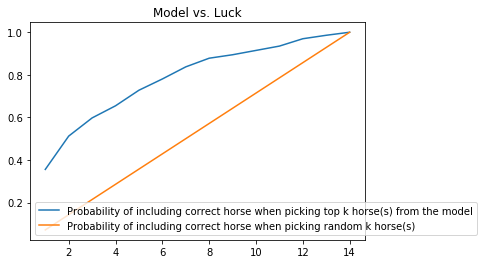

In [79]:
plt.plot([i for i in range(1,15)], prob_top_k)
plt.plot([i for i in range(1,15)], normal_odds)
plt.legend(['Probability of including correct horse when picking top k horse(s) from the model',
            'Probability of including correct horse when picking random k horse(s)'])
plt.title('Model vs. Luck')

In [80]:
importances = sorted(list(zip(rf.feature_importances_,x.columns)), key = lambda x: x[0], reverse = True)

In [81]:
top_k = 20
top = importances[:top_k]

top_imp = [i[0] for i in top]
top_feat = [i[1] for i in top]

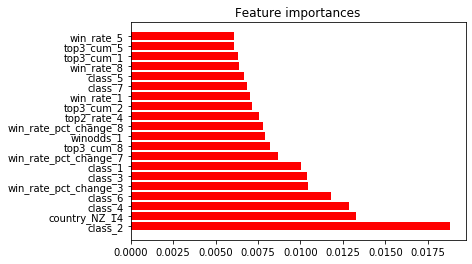

In [82]:
#Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(top_feat, top_imp,
       color="r",align="center")

plt.yticks(rotation = 0)
#Edited here (put top_k)
# plt.xlim([-1, top_k])
plt.show()

### Bet strategy

In [110]:
x_test['pred_win'] = y_pred
x_test['actual_win'] = y_test

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [98]:
results.groupby(['date'])['raceno'].nunique().to_frame('count_race').reset_index()

,date,count_race
0,2015-06-03,8
1,2015-06-07,10
2,2015-06-10,8
3,2015-06-14,11
4,2015-06-17,8
...,...,...
132,2017-06-07,4
133,2017-06-18,7
134,2017-06-28,7
135,2017-07-09,9


In [99]:
x_test.groupby(['date'])['raceno'].nunique().to_frame('count_race').reset_index().sort_index(by=['count_race'],ascending=False)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


,date,count_race
38,2017-07-16,9
37,2017-07-09,9
5,2017-01-08,9
15,2017-03-05,8
29,2017-05-13,8
21,2017-03-29,8
30,2017-05-17,7
24,2017-04-09,7
20,2017-03-26,7
17,2017-03-12,7


In [111]:
### choose one day for strategy
strategy = x_test[x_test['date']=='2017-07-09'].reset_index()

In [112]:
strategy

,index,date,raceno,declarwt_1,declarwt_2,declarwt_3,declarwt_4,declarwt_5,declarwt_6,declarwt_7,declarwt_8,declarwt_9,declarwt_10,declarwt_11,declarwt_12,declarwt_13,declarwt_14,winodds_1,winodds_2,winodds_3,winodds_4,winodds_5,winodds_6,winodds_7,winodds_8,winodds_9,winodds_10,winodds_11,winodds_12,winodds_13,winodds_14,age_1,sex_Female_1,sex_Male_1,sex_N/A_1,sex_Others_1,country_AUS_1,country_N/A_1,country_NZ_1,country_Others_1,age_2,sex_Female_2,sex_Male_2,sex_N/A_2,sex_Others_2,country_AUS_2,country_N/A_2,country_NZ_2,country_Others_2,age_3,sex_Female_3,sex_Male_3,sex_N/A_3,sex_Others_3,country_AUS_3,country_N/A_3,country_NZ_3,country_Others_3,age_4,sex_Female_4,sex_Male_4,sex_N/A_4,sex_Others_4,country_AUS_4,country_N/A_4,country_NZ_4,country_Others_4,age_5,sex_Female_5,sex_Male_5,sex_N/A_5,sex_Others_5,country_AUS_5,country_N/A_5,country_NZ_5,country_Others_5,age_6,sex_Female_6,sex_Male_6,sex_N/A_6,sex_Others_6,country_AUS_6,country_N/A_6,country_NZ_6,country_Others_6,age_7,sex_Female_7,sex_Male_7,sex_N/A_7,sex_Others_7,country_AUS_7,country_N/A_7,country_NZ_7,country_Others_7,age_8,sex_Female_8,sex_Male_8,sex_N/A_8,sex_Others_8,country_AUS_8,country_N/A_8,country_NZ_8,country_Others_8,age_9,sex_Female_9,sex_Male_9,sex_N/A_9,sex_Others_9,country_AUS_9,country_N/A_9,country_NZ_9,country_Others_9,age_10,sex_Female_10,sex_Male_10,sex_N/A_10,sex_Others_10,country_AUS_10,country_N/A_10,country_NZ_10,country_Others_10,age_11,sex_Female_11,sex_Male_11,sex_N/A_11,sex_Others_11,country_AUS_11,country_N/A_11,country_NZ_11,country_Others_11,age_12,sex_Female_12,sex_Male_12,sex_N/A_12,sex_Others_12,country_AUS_12,country_N/A_12,country_NZ_12,country_Others_12,age_13,sex_Female_13,sex_Male_13,sex_N/A_13,sex_Others_13,country_AUS_13,country_N/A_13,country_NZ_13,country_Others_13,age_14,sex_Female_14,sex_Male_14,sex_N/A_14,sex_Others_14,country_AUS_14,country_N/A_14,country_NZ_14,country_Others_14,appear_cum_1,win_cum_1,top3_cum_1,class_1,class_change_1,win_rate_1,top3_rate_1,win_rate_pct_change_1,top3_pct_change_1,appear_cum_2,win_cum_2,top3_cum_2,class_2,class_change_2,win_rate_2,top3_rate_2,win_rate_pct_change_2,top3_pct_change_2,appear_cum_3,win_cum_3,top3_cum_3,class_3,class_change_3,win_rate_3,top3_rate_3,win_rate_pct_change_3,top3_pct_change_3,appear_cum_4,win_cum_4,top3_cum_4,class_4,class_change_4,win_rate_4,top3_rate_4,win_rate_pct_change_4,top3_pct_change_4,appear_cum_5,win_cum_5,top3_cum_5,class_5,class_change_5,win_rate_5,top3_rate_5,win_rate_pct_change_5,top3_pct_change_5,appear_cum_6,win_cum_6,top3_cum_6,class_6,class_change_6,win_rate_6,top3_rate_6,win_rate_pct_change_6,top3_pct_change_6,appear_cum_7,win_cum_7,top3_cum_7,class_7,class_change_7,win_rate_7,top3_rate_7,win_rate_pct_change_7,top3_pct_change_7,appear_cum_8,win_cum_8,top3_cum_8,class_8,class_change_8,win_rate_8,top3_rate_8,win_rate_pct_change_8,top3_pct_change_8,appear_cum_9,win_cum_9,top3_cum_9,class_9,class_change_9,win_rate_9,top3_rate_9,win_rate_pct_change_9,top3_pct_change_9,appear_cum_10,win_cum_10,top3_cum_10,class_10,class_change_10,win_rate_10,top3_rate_10,win_rate_pct_change_10,top3_pct_change_10,appear_cum_11,win_cum_11,top3_cum_11,class_11,class_change_11,win_rate_11,top3_rate_11,win_rate_pct_change_11,top3_pct_change_11,appear_cum_12,win_cum_12,top3_cum_12,class_12,class_change_12,win_rate_12,top3_rate_12,win_rate_pct_change_12,top3_pct_change_12,appear_cum_13,win_cum_13,top3_cum_13,class_13,class_change_13,win_rate_13,top3_rate_13,win_rate_pct_change_13,top3_pct_change_13,appear_cum_14,win_cum_14,top3_cum_14,class_14,class_change_14,win_rate_14,top3_rate_14,win_rate_pct_change_14,top3_pct_change_14,appear_cum_1,win_cum_1,top2_cum_1,top3_cum_1,win_rate_1,top2_rate_1,top3_rate_1,appear_cum_2,win_cum_2,top2_cum_2,top3_cum_2,win_rate_2,top2_rate_2,top3_rate_2,appear_cum_3,win_cum_3,top2_cum_3,top3_cum_3,win_rate_3,top2_rate_3,top3_rate_3,appear_cum_4,win_cum_4,top2_cum_4,top3_cum_4,win_rate_4,top2_rate_4,top3_rate_4,appear_cum_5,win_cum_5,top2_cum_5

In [114]:
### if predict is right, we earn amount * winodds
### if predict is wrong, we lose amount
result = []
amount = 100
for i in range(len(strategy)):
    k = strategy['pred_win'][i]
    if k == strategy['actual_win'][i]:
        outcome = amount * strategy['winodds_'+str(k)][i]
        result.append(outcome)
    else:
        result.append(-amount)
sum(result)

### we invest 900, and get 2430 in the end.

2430.0